In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import entropy
import seaborn as sn

destDatasetPath = "../dataset/users_clean_with_indicators_with_outliers.h5"

In [2]:
%%time
dataseUsersCleanedPath = "../dataset/users_clean_with_outliers.h5"
df_users = pd.read_hdf(dataseUsersCleanedPath)

CPU times: user 281 ms, sys: 25 ms, total: 306 ms
Wall time: 325 ms


In [3]:
%%time
datasetTweetsCleanedPath = "../dataset/tweets_clean_with_outliers.h5"
df_tweets = pd.read_hdf(datasetTweetsCleanedPath)

CPU times: user 8.9 s, sys: 8.57 s, total: 17.5 s
Wall time: 18 s


In [4]:
df_users.corr()

/tmp/ipykernel_10022/703710710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_users.corr()


,bot,statuses_count
bot,1.000000,-0.259272
statuses_count,-0.259272,1.000000


In [5]:
df_tweets.corr()

/tmp/ipykernel_10022/2662415960.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_tweets.corr()


,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
user_id,NaN,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
retweet_count,-0.0,1.000000,0.000168,0.009809,0.002315,-0.007002,0.030333
reply_count,-0.0,0.000168,1.000000,0.000971,0.000091,0.000262,0.000264
favorite_count,-0.0,0.009809,0.000971,1.000000,0.002447,0.002874,0.002492
num_hashtags,-0.0,0.002315,0.000091,0.002447,1.000000,0.077643,0.078555
num_urls,-0.0,-0.007002,0.000262,0.002874,0.077643,1.000000,-0.059280
num_mentions,-0.0,0.030333,0.000264,0.002492,0.078555,-0.059280,1.000000


## Tweet_length

In [6]:
df_tweets["tweet_length"] = df_tweets["text"].apply(lambda x: len(x))

In [7]:
df_tweets

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,tweet_length
0,3.277463e+08,0,0,0,0,0,0,2019-09-11 14:53:55,"if man is a little lower than angels, then ang...",64
1,3.337229e+08,1,0,0,0,0,1,2020-04-01 20:27:04,"""@bestwshhvids: how do you say these words wit...",101
2,2.379756e+09,0,0,0,0,0,1,2019-05-02 13:34:31,@lolatcomedy awsome,19
3,4.662269e+08,0,0,0,0,0,0,2019-11-04 07:17:37,stephen hawkins: i buchi neri non esistono se ...,85
4,1.355538e+09,114,0,0,1,0,1,2020-03-11 16:45:31,rt @tibbs_montris: so ready for wednesday!,42
...,...,...,...,...,...,...,...,...,...,...
11712085,8.657052e+06,0,0,1,0,0,1,2019-04-26 02:53:34,@_victoriamm twoot.,19
11712086,2.209330e+08,0,0,0,0,0,0,2018-05-04 05:29:33,esta manana aun esta muy frio ! miren esto ! ...,58
11712087,5.874910e+08,0,0,0,0,0,1,2020-04-17 02:51:53,"@warriors congrats, maybe i'll be able to get ...",118
11712089,1.278956e+08,0,0,1,1,0,0,2019-03-07 19:56:55,shooting crew of porn movies. #theworstjobtohave,48


In [8]:
def count_special_characters(text):
    counter = 0
   
    for i in range(0, len(text)):
        if (not (text[i].isalpha() or text[i].isdigit()) and text[i] != ' '):
            counter += 1
    
    return counter

## num_special_chars

In [9]:
df_tweets["num_special_chars"] = df_tweets["text"].apply(count_special_characters)

In [10]:
df_tweets

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,tweet_length,num_special_chars
0,3.277463e+08,0,0,0,0,0,0,2019-09-11 14:53:55,"if man is a little lower than angels, then ang...",64,2
1,3.337229e+08,1,0,0,0,0,1,2020-04-01 20:27:04,"""@bestwshhvids: how do you say these words wit...",101,14
2,2.379756e+09,0,0,0,0,0,1,2019-05-02 13:34:31,@lolatcomedy awsome,19,1
3,4.662269e+08,0,0,0,0,0,0,2019-11-04 07:17:37,stephen hawkins: i buchi neri non esistono se ...,85,2
4,1.355538e+09,114,0,0,1,0,1,2020-03-11 16:45:31,rt @tibbs_montris: so ready for wednesday!,42,4
...,...,...,...,...,...,...,...,...,...,...,...
11712085,8.657052e+06,0,0,1,0,0,1,2019-04-26 02:53:34,@_victoriamm twoot.,19,3
11712086,2.209330e+08,0,0,0,0,0,0,2018-05-04 05:29:33,esta manana aun esta muy frio ! miren esto ! ...,58,3
11712087,5.874910e+08,0,0,0,0,0,1,2020-04-17 02:51:53,"@warriors congrats, maybe i'll be able to get ...",118,5
11712089,1.278956e+08,0,0,1,1,0,0,2019-03-07 19:56:55,shooting crew of porn movies. #theworstjobtohave,48,2


#### tweets_count: how many tweets were published by the user

In [11]:
df_counts = df_tweets.user_id.value_counts().to_frame("tweet_count")
df_counts

,tweet_count
-1.000000e+00,213715
4.916306e+08,3926
1.693275e+09,3906
1.570298e+08,3901
7.004532e+06,3897
...,...
1.373570e+09,1
6.000000e+01,1
1.726000e+03,1
8.490000e+02,1


In [12]:
df_users = df_users.merge(df_counts, how="inner", left_index=True, right_index=True)
df_users

,name,lang,bot,created_at,statuses_count,tweet_count
2.353594e+09,lamonica raborn,en,1,2019-02-22 18:00:42,76.0,127
2.358851e+09,lourie botton,en,0,2019-02-26 03:02:32,54.0,116
1.379596e+08,dadan syarifudin,en,1,2015-04-30 07:09:56,3.0,3
4.661248e+08,carletto focia,it,1,2017-01-18 02:49:18,50.0,1378
2.571494e+09,mbk ebook,en,0,2019-06-18 19:30:21,7085.0,3506
...,...,...,...,...,...,...
2.911862e+09,madrid lae maika .,en,0,2019-11-29 13:16:02,1126.0,1066
1.378533e+09,clau sato,en,0,2018-04-27 03:01:58,3024.0,2003
1.269841e+08,alma leticia nuño,es,0,2015-03-29 17:01:24,6.0,6
2.383026e+09,minnie guadagno,en,1,2019-03-13 02:44:13,42.0,101


In [13]:
count_peruser = df_tweets.groupby(["user_id"]).sum()
count_peruser

/tmp/ipykernel_10022/3974280124.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  count_peruser = df_tweets.groupby(["user_id"]).sum()


,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_length,num_special_chars
user_id,,,,,,,,
-1.000000e+00,96712376,200931,1188367,31965,30259,93679,15724946,1110882
0.000000e+00,93,0,1,0,0,1,296,25
2.000000e+00,0,0,0,0,0,0,66,9
3.000000e+00,0,0,0,0,0,3,67,8
5.000000e+00,0,0,0,0,0,0,192,6
...,...,...,...,...,...,...,...,...
4.800000e+64,0,0,0,0,0,0,20,5
3.300000e+66,0,0,0,0,0,0,0,0
4.000000e+95,1,0,0,0,0,0,0,0


In [14]:
std_peruser = df_tweets.groupby(["user_id"]).apply(np.std)

/home/dferraro/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [15]:
std_peruser

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,tweet_length,num_special_chars
user_id,,,,,,,,,,
-1.000000e+00,0.0,8880.143332,163.809995,1527.869572,0.575563,0.362908,0.767652,260 days 23:05:07.145700288,38.384372,5.619868
0.000000e+00,0.0,32.050741,0.000000,0.372678,0.000000,0.000000,0.372678,80 days 03:30:22.327997713,32.448249,3.131382
2.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48 days 14:39:25.500000,33.000000,4.500000
3.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,851 days 18:16:38.803556736,25.486380,3.091206
5.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101 days 23:57:48.500000,26.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...
4.800000e+64,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00,0.000000,0.000000
3.300000e+66,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00,0.000000,0.000000
4.000000e+95,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00,0.000000,0.000000


In [16]:
df_tweets.groupby(["user_id"])["retweet_count"].describe()

,count,mean,std,min,25%,50%,75%,max
user_id,,,,,,,,
-1.000000e+00,213715.0,452.529659,8880.164108,0.0,0.0,0.0,0.0,2098844.0
0.000000e+00,6.0,15.500000,35.109828,0.0,0.0,0.0,4.5,87.0
2.000000e+00,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3.000000e+00,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5.000000e+00,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4.800000e+64,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
3.300000e+66,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
4.000000e+95,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


In [17]:
std_peruser.describe()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,tweet_length,num_special_chars
count,12142.0,12142.000000,12142.000000,12142.000000,12142.000000,12142.000000,12142.000000,12142,12142.000000,12142.000000
mean,0.0,2356.751530,5.692061,85.405956,0.388754,0.147816,0.403074,385 days 03:38:26.632644600,35.364482,5.654807
std,0.0,11100.037470,98.261319,1363.236210,0.313390,0.177617,0.325088,2212 days 15:04:25.078764256,11.445867,6.733061
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00,0.000000,0.000000
25%,0.0,0.130724,0.000000,0.132860,0.219340,0.000000,0.065146,26 days 11:55:39.300284874,33.869087,2.828390
50%,0.0,0.306892,0.000000,0.255147,0.341708,0.112834,0.463034,38 days 20:30:58.325119253,36.962049,3.750262
75%,0.0,822.420562,0.000000,0.732474,0.497723,0.255176,0.590820,85 days 19:00:40.787928623,39.606805,4.997439
max,0.0,338366.011994,5248.637564,50414.875091,7.574514,4.499433,3.639834,18866 days 08:39:13.076987648,162.000000,120.500000


In [18]:
def add_avg_column(df, attr_count, attr, ):
    newColumnTitle = attr+"_avg"
    df[newColumnTitle] = attr_count[attr] / df["tweet_count"]

In [19]:
add_avg_column(df_users, count_peruser, "retweet_count")
add_avg_column(df_users, count_peruser, "reply_count")
add_avg_column(df_users, count_peruser, "favorite_count")
add_avg_column(df_users, count_peruser, "num_hashtags")
add_avg_column(df_users, count_peruser, "num_urls")
add_avg_column(df_users, count_peruser, "num_mentions")
add_avg_column(df_users, count_peruser, "tweet_length")
add_avg_column(df_users, count_peruser, "num_special_chars")
df_users

,name,lang,bot,created_at,statuses_count,tweet_count,retweet_count_avg,reply_count_avg,favorite_count_avg,num_hashtags_avg,num_urls_avg,num_mentions_avg,tweet_length_avg,num_special_chars_avg
2.353594e+09,lamonica raborn,en,1,2019-02-22 18:00:42,76.0,127,0.039370,0.0,0.039370,0.102362,0.000000,0.275591,63.409449,3.952756
2.358851e+09,lourie botton,en,0,2019-02-26 03:02:32,54.0,116,0.025862,0.0,0.051724,0.025862,0.000000,0.353448,69.672414,3.500000
1.379596e+08,dadan syarifudin,en,1,2015-04-30 07:09:56,3.0,3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,17.333333,4.333333
4.661248e+08,carletto focia,it,1,2017-01-18 02:49:18,50.0,1378,0.861393,0.0,0.185051,0.080552,0.025399,0.006531,88.524673,4.818578
2.571494e+09,mbk ebook,en,0,2019-06-18 19:30:21,7085.0,3506,0.017399,0.0,0.063605,0.129492,0.000856,0.522533,73.765830,3.669994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.911862e+09,madrid lae maika .,en,0,2019-11-29 13:16:02,1126.0,1066,6152.263602,0.0,0.059099,0.212946,0.029081,0.777674,53.581614,5.070356
1.378533e+09,clau sato,en,0,2018-04-27 03:01:58,3024.0,2003,395.651523,0.0,0.221168,0.125811,0.100349,0.542686,60.890664,4.344983
1.269841e+08,alma leticia nuño,es,0,2015-03-29 17:01:24,6.0,6,0.000000,0.0,0.000000,0.333333,0.666667,0.333333,67.666667,6.666667
2.383026e+09,minnie guadagno,en,1,2019-03-13 02:44:13,42.0,101,0.069307,0.0,0.089109,0.009901,0.000000,0.376238,63.910891,3.930693


In [20]:
df_users.describe()

,bot,statuses_count,tweet_count,retweet_count_avg,reply_count_avg,favorite_count_avg,num_hashtags_avg,num_urls_avg,num_mentions_avg,tweet_length_avg,num_special_chars_avg
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,5750.093500,940.685871,362.744886,0.369431,17.567901,0.154632,0.090168,0.360214,69.420737,5.618642
std,0.499031,18752.596595,1227.536451,2180.431575,7.723115,362.633067,0.230345,0.181239,0.367936,16.519805,5.589786
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,0.000000,42.000000,65.000000,0.023810,0.000000,0.024031,0.050000,0.000000,0.010623,60.634728,3.722736
50%,1.000000,71.000000,132.000000,0.108611,0.000000,0.064698,0.085106,0.017844,0.315385,66.760846,4.500412
75%,1.000000,2520.250000,1700.000000,117.474227,0.000000,0.269265,0.170313,0.078116,0.524956,78.873718,5.709773
max,1.000000,399555.000000,3926.000000,63995.214286,621.666667,22559.916667,6.430140,2.000000,5.782609,245.000000,145.500000


In [21]:
#df_users = df_users.merge(count_peruser, how="inner", left_index=True, right_index=True)
#df_users

In [22]:
df_users.dtypes

name                             object
lang                             object
bot                               int64
created_at               datetime64[ns]
statuses_count                  float64
tweet_count                       int64
retweet_count_avg               float64
reply_count_avg                 float64
favorite_count_avg              float64
num_hashtags_avg                float64
num_urls_avg                    float64
num_mentions_avg                float64
tweet_length_avg                float64
num_special_chars_avg           float64
dtype: object

In [23]:
df_tweets.dtypes

user_id                     float64
retweet_count                 int64
reply_count                   int64
favorite_count                int64
num_hashtags                  int64
num_urls                      int64
num_mentions                  int64
created_at           datetime64[ns]
text                         object
tweet_length                  int64
num_special_chars             int64
dtype: object

In [24]:
df_tweets.groupby('user_id').transform('sum')

/tmp/ipykernel_10022/1629384300.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tweets.groupby('user_id').transform('sum')


,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_length,num_special_chars
0,38,0,53,0,1525,0,284175,16637
1,425305,442,1237,236,358,2950,192315,14670
2,3,0,8,10,0,39,6615,418
3,3941,0,1618,105,40,16,135228,7446
4,5571619,0,376,549,259,2714,172403,15516
...,...,...,...,...,...,...,...,...
11712085,20929,0,916,376,542,2247,190295,12754
11712086,44,22,2104,16,3900,970,295879,29184
11712087,154307,87,987,105,154,3172,274412,15043
11712089,182850,0,273,490,113,977,136384,9256


In [25]:
df_tweets.loc[df_tweets.user_id == 327746321.0].sum()

/tmp/ipykernel_10022/3695912449.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_tweets.loc[df_tweets.user_id == 327746321.0].sum()


user_id                                                1158255498414.0
retweet_count                                                       38
reply_count                                                          0
favorite_count                                                      53
num_hashtags                                                         0
num_urls                                                          1525
num_mentions                                                         0
text                 if man is a little lower than angels, then ang...
tweet_length                                                    284175
num_special_chars                                                16637
dtype: object

In [26]:
df_tweets.groupby('user_id')["retweet_count"].sum()

user_id
-1.000000e+00     96712376
 0.000000e+00           93
 2.000000e+00            0
 3.000000e+00            0
 5.000000e+00            0
                    ...   
 4.800000e+64            0
 3.300000e+66            0
 4.000000e+95            1
 7.000000e+161           0
 3.000000e+296           0
Name: retweet_count, Length: 12142, dtype: int64

In [27]:
def compute_entropy(tweets, column):
    new_column_name = column+"_entropy"
    new_column = tweets.groupby(['user_id'])[column].apply(entropy).to_frame(new_column_name)
    new_column.fillna(0, inplace=True)
    return df_users.merge(new_column, how="inner", left_index=True, right_index=True)

In [28]:
new_column = df_tweets.groupby(['user_id'])["reply_count"].apply(entropy).to_frame("reply_count_entr")
new_column.fillna(0, inplace=True)

/home/dferraro/.local/lib/python3.10/site-packages/scipy/stats/_entropy.py:77: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


In [29]:
new_column.value_counts()

reply_count_entr
0.000000            11064
0.693147              340
1.098612              136
1.386294               68
0.636514               44
                    ...  
1.153742                1
1.131748                1
1.123083                1
1.098612                1
7.069189                1
Length: 330, dtype: int64

In [30]:
df_users = compute_entropy(df_tweets, "retweet_count")
df_users = compute_entropy(df_tweets, "reply_count")
df_users = compute_entropy(df_tweets, "favorite_count")
df_users = compute_entropy(df_tweets, "num_hashtags")
df_users = compute_entropy(df_tweets, "num_urls")
df_users = compute_entropy(df_tweets, "num_mentions")
df_users = compute_entropy(df_tweets, "tweet_length")
df_users = compute_entropy(df_tweets, "num_special_chars")
df_users


/home/dferraro/.local/lib/python3.10/site-packages/scipy/stats/_entropy.py:77: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
/home/dferraro/.local/lib/python3.10/site-packages/scipy/stats/_entropy.py:77: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
/home/dferraro/.local/lib/python3.10/site-packages/scipy/stats/_entropy.py:77: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
/home/dferraro/.local/lib/python3.10/site-packages/scipy/stats/_entropy.py:77: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
/home/dferraro/.local/lib/python3.10/site-packages/scipy/stats/_entropy.py:77: RuntimeWarning: invalid value encountered in divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
/home/dferraro/.local/lib/python3.10/site-packages/scipy/stats/_entropy.py:77: R

,name,lang,bot,created_at,statuses_count,tweet_count,retweet_count_avg,reply_count_avg,favorite_count_avg,num_hashtags_avg,...,tweet_length_avg,num_special_chars_avg,retweet_count_entropy,reply_count_entropy,favorite_count_entropy,num_hashtags_entropy,num_urls_entropy,num_mentions_entropy,tweet_length_entropy,num_special_chars_entropy
2.353594e+09,lamonica raborn,en,1,2019-02-22 18:00:42,76.0,127,0.039370,0.0,0.039370,0.102362,...,63.409449,3.952756,1.609438,0.0,1.609438,1.951260,0.000000,3.555348,4.654218,4.331262
2.358851e+09,lourie botton,en,0,2019-02-26 03:02:32,54.0,116,0.025862,0.0,0.051724,0.025862,...,69.672414,3.500000,1.098612,0.0,1.791759,1.098612,0.000000,3.713572,4.580228,4.430671
1.379596e+08,dadan syarifudin,en,1,2015-04-30 07:09:56,3.0,3,0.000000,0.0,0.000000,0.000000,...,17.333333,4.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.051954,1.057905
4.661248e+08,carletto focia,it,1,2017-01-18 02:49:18,50.0,1378,0.861393,0.0,0.185051,0.080552,...,88.524673,4.818578,2.164284,0.0,5.155743,3.993476,3.555348,1.831020,7.138666,6.917765
2.571494e+09,mbk ebook,en,0,2019-06-18 19:30:21,7085.0,3506,0.017399,0.0,0.063605,0.129492,...,73.765830,3.669994,3.965939,0.0,5.332573,5.842069,1.098612,7.339108,8.061385,7.993446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.911862e+09,madrid lae maika .,en,0,2019-11-29 13:16:02,1126.0,1066,6152.263602,0.0,0.059099,0.212946,...,53.581614,5.070356,4.804405,0.0,4.016500,4.915112,3.389268,6.361533,6.764719,6.665332
1.378533e+09,clau sato,en,0,2018-04-27 03:01:58,3024.0,2003,395.651523,0.0,0.221168,0.125811,...,60.890664,4.344983,3.556523,0.0,5.770773,5.253873,5.296408,6.678788,7.394807,7.288604
1.269841e+08,alma leticia nuño,es,0,2015-03-29 17:01:24,6.0,6,0.000000,0.0,0.000000,0.333333,...,67.666667,6.666667,0.000000,0.0,0.000000,0.693147,1.386294,0.693147,1.714799,1.461833
2.383026e+09,minnie guadagno,en,1,2019-03-13 02:44:13,42.0,101,0.069307,0.0,0.089109,0.009901,...,63.910891,3.930693,1.747868,0.0,2.197225,0.000000,0.000000,3.637586,4.384845,4.325200


# Save to file

In [31]:
df_users.to_hdf(destDatasetPath, 'df_users', mode='w')

## Correlation matrix

/tmp/ipykernel_10022/2682159135.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_users.corr()


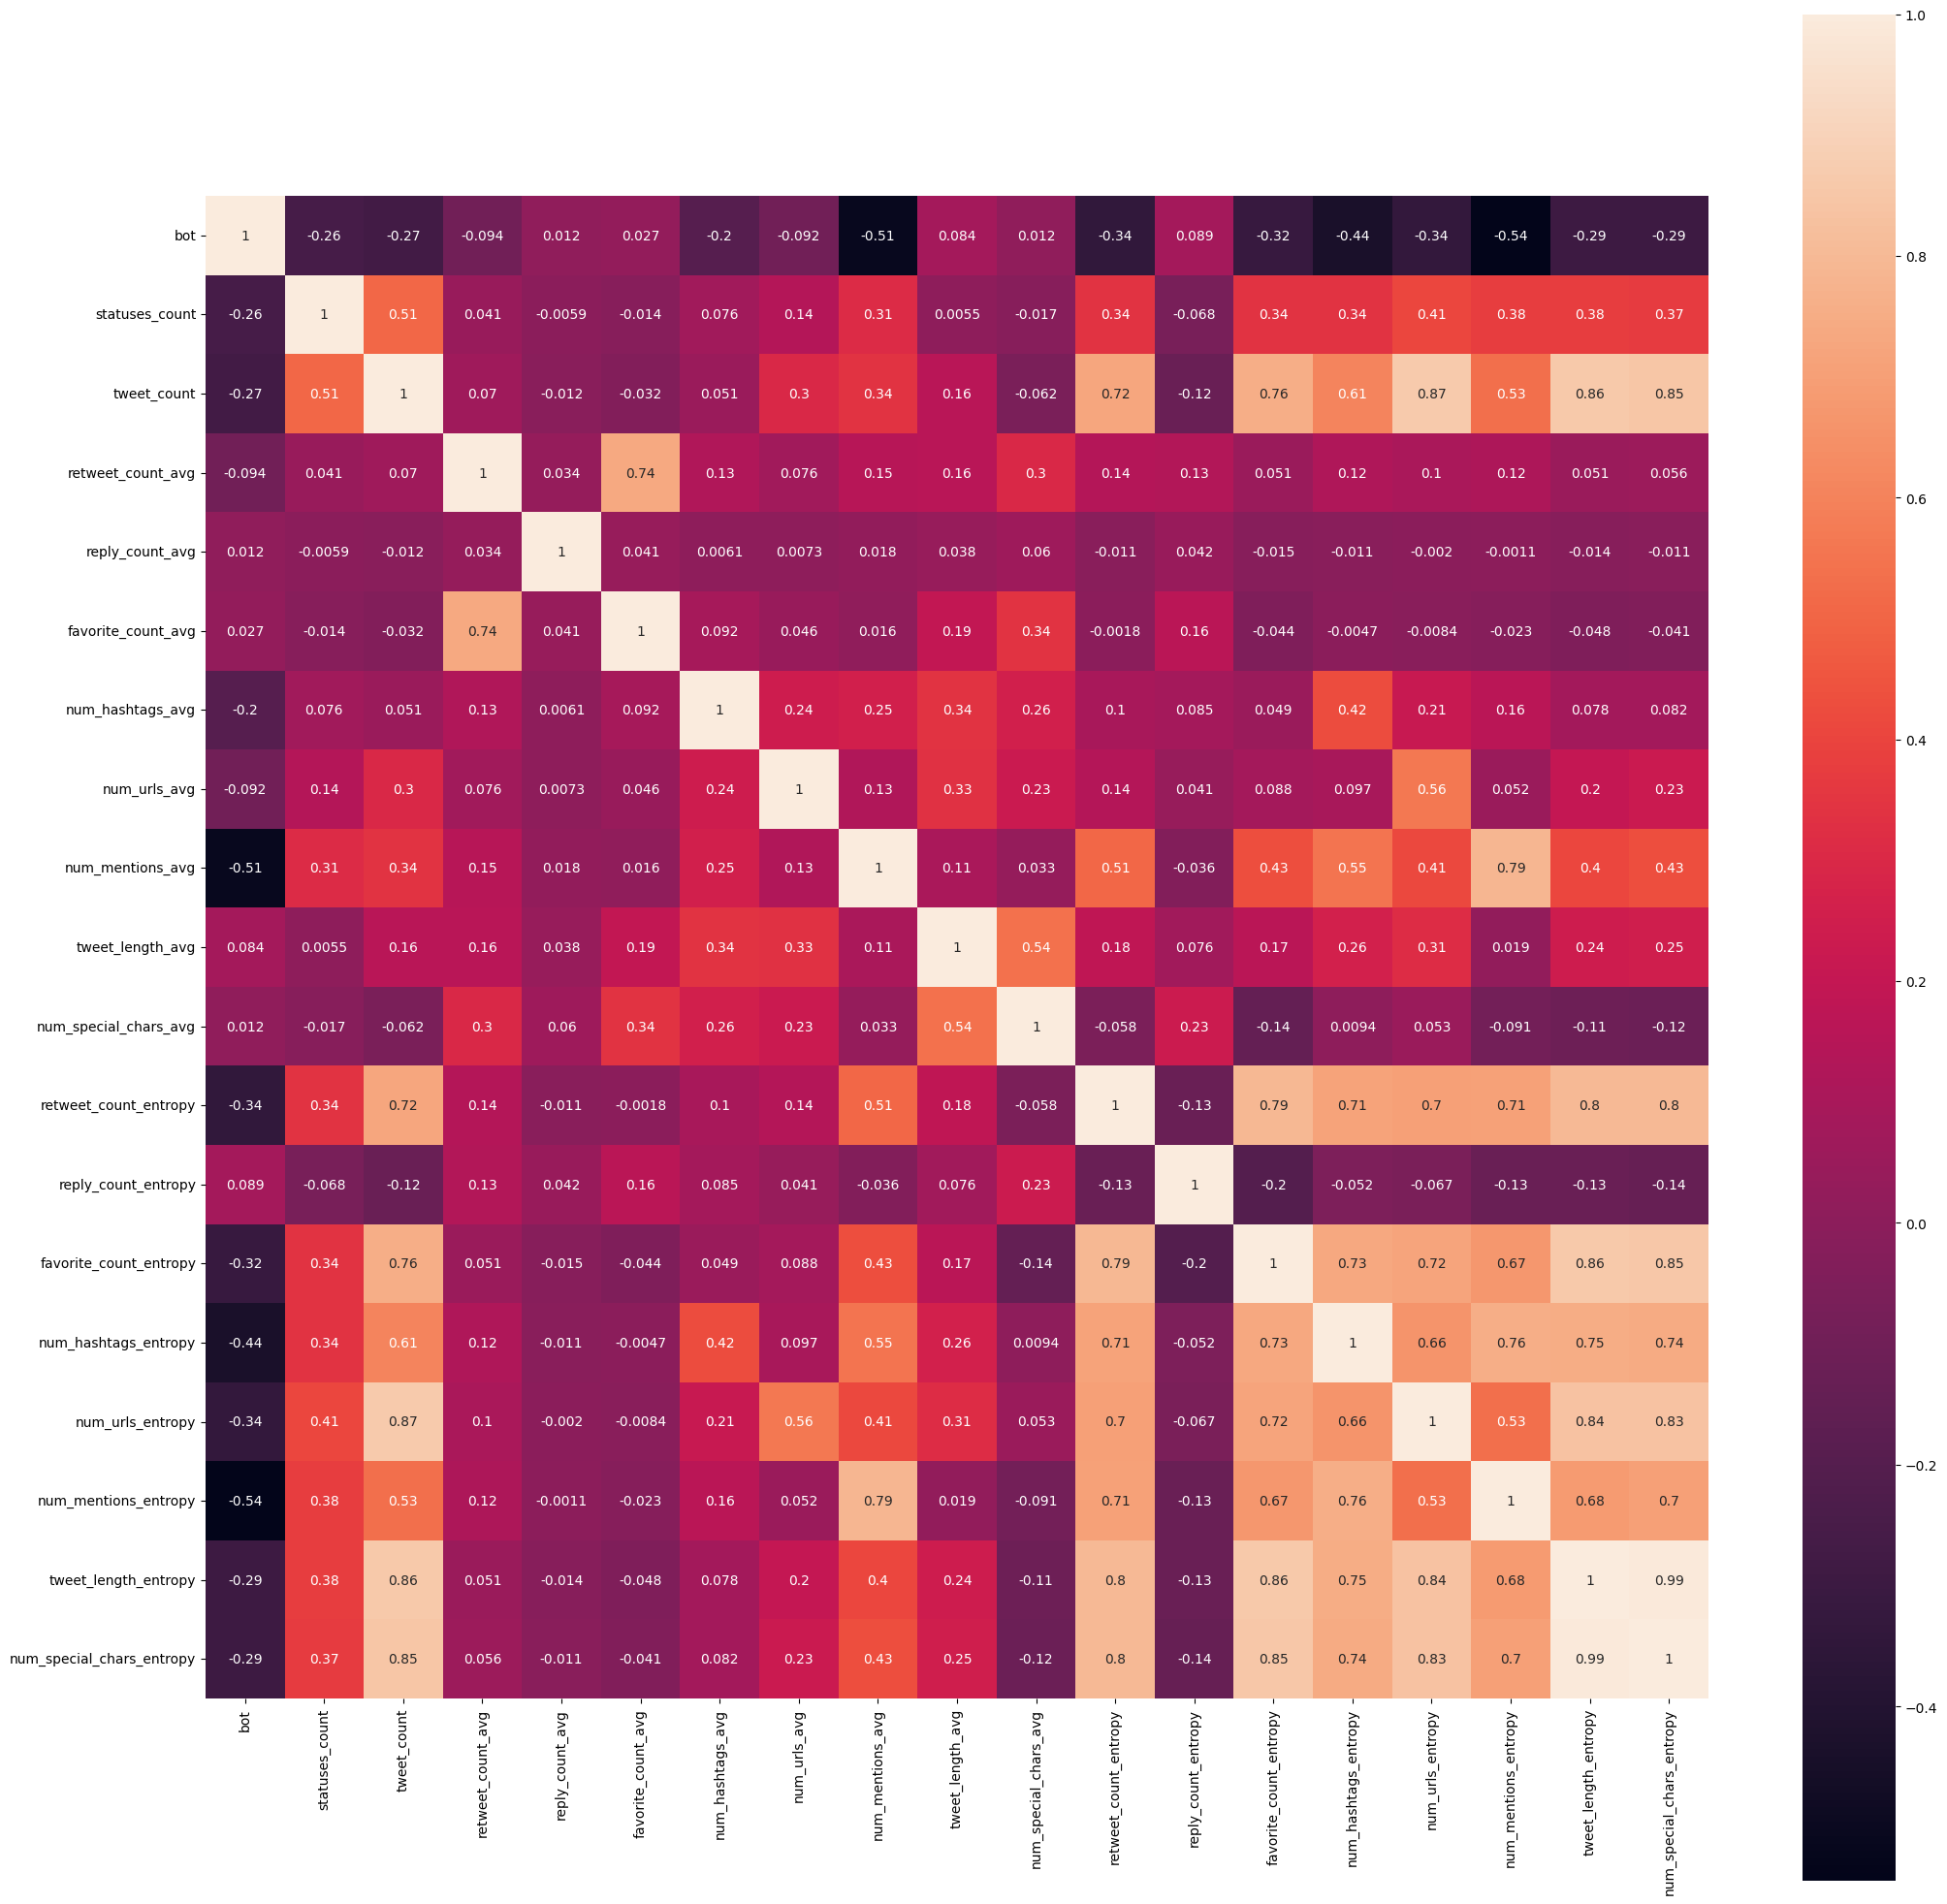

In [32]:
corr_matrix = df_users.corr()
fig, ax = plt.subplots(figsize=(25, 25))         # Sample figsize in inches
mask = np.zeros_like(corr_matrix)
sn.heatmap(corr_matrix, annot=True, mask=mask, square=True)

plt.show()

In [33]:
for i in range(19):
    for j in range(i):
        if abs(corr_matrix.iat[i, j]) > 0.8:
            print(corr_matrix.columns[i], " - ", corr_matrix.columns[j], " - ", corr_matrix.iat[i, j])

num_urls_entropy  -  tweet_count  -  0.8660114576237744
tweet_length_entropy  -  tweet_count  -  0.8594384148388088
tweet_length_entropy  -  favorite_count_entropy  -  0.8570152645967619
tweet_length_entropy  -  num_urls_entropy  -  0.8366785765032893
num_special_chars_entropy  -  tweet_count  -  0.8481040105332633
num_special_chars_entropy  -  favorite_count_entropy  -  0.8541069159898369
num_special_chars_entropy  -  num_urls_entropy  -  0.8348783195045102
num_special_chars_entropy  -  tweet_length_entropy  -  0.9925011483126704


TODO:
- entropy of each attribute DONEEEEEE IT!!!!!
- create two dataset: one with removed outliers and the second one with median in place of outliers
- check for correlation

CLUSTERING:
- apply log scale to each attribute and normalization (needed by clustering)
- ...